In [1]:
import numpy as np
import tensorflow as tf
import helper

C:\Users\gsund\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
helper.download_dataset()
train_images, train_labels, validation_images, validation_labels, test_images, test_labels = helper.load_data()

Getting MNIST Dataset...
Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz
Data Extracted.


In [19]:
inputs = tf.placeholder(shape=(None, 784), dtype=tf.float32, name='inputs')
targets = tf.placeholder(shape=(None, 784), dtype=tf.float32, name='targets')

#encoder
hidden_layer1_size = 128
hidden_layer1 = tf.layers.dense(inputs, hidden_layer1_size, activation=tf.nn.relu)

hidden_layer2_size = 32
encoded = tf.layers.dense(hidden_layer1, hidden_layer2_size, activation=tf.nn.relu)

#decoder
hidden_layer3_size = 128
hidden_layer3 = tf.layers.dense(encoded, hidden_layer3_size, activation=tf.nn.relu)

logits = tf.layers.dense(hidden_layer3, 784, activation=None)
decoded = tf.nn.sigmoid(logits, name='outputs')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets, logits=logits)
cost = tf.reduce_mean(loss)
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [26]:
#hyper parameters
epochs = 30
batch_size = 256

In [29]:
init = tf.global_variables_initializer()

saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        for ii in range(0, len(train_images), batch_size):
            batch_images = train_images[ii : ii + batch_size]
            feed = {
                inputs : batch_images,
                targets : batch_images
            }
            _cost, _ = sess.run([cost, optimizer], feed_dict=feed)
            
            print("Epoch {:}/{:}....".format(epoch+1, epochs), 
                  "Training loss : {:0.3f}".format(_cost))
    saver.save(sess, "./autoencoder.ckpt")


Epoch 1/30.... Training loss : 0.693
Epoch 1/30.... Training loss : 0.688
Epoch 1/30.... Training loss : 0.682
Epoch 1/30.... Training loss : 0.673
Epoch 1/30.... Training loss : 0.658
Epoch 1/30.... Training loss : 0.644
Epoch 1/30.... Training loss : 0.631
Epoch 1/30.... Training loss : 0.605
Epoch 1/30.... Training loss : 0.584
Epoch 1/30.... Training loss : 0.557
Epoch 1/30.... Training loss : 0.517
Epoch 1/30.... Training loss : 0.484
Epoch 1/30.... Training loss : 0.450
Epoch 1/30.... Training loss : 0.427
Epoch 1/30.... Training loss : 0.395
Epoch 1/30.... Training loss : 0.364
Epoch 1/30.... Training loss : 0.349
Epoch 1/30.... Training loss : 0.349
Epoch 1/30.... Training loss : 0.339
Epoch 1/30.... Training loss : 0.324
Epoch 1/30.... Training loss : 0.380
Epoch 1/30.... Training loss : 0.326
Epoch 1/30.... Training loss : 0.292
Epoch 1/30.... Training loss : 0.305
Epoch 1/30.... Training loss : 0.291
Epoch 1/30.... Training loss : 0.286
Epoch 1/30.... Training loss : 0.275
E

Epoch 2/30.... Training loss : 0.161
Epoch 2/30.... Training loss : 0.167
Epoch 2/30.... Training loss : 0.170
Epoch 2/30.... Training loss : 0.162
Epoch 2/30.... Training loss : 0.166
Epoch 2/30.... Training loss : 0.174
Epoch 2/30.... Training loss : 0.162
Epoch 2/30.... Training loss : 0.168
Epoch 2/30.... Training loss : 0.170
Epoch 2/30.... Training loss : 0.163
Epoch 2/30.... Training loss : 0.167
Epoch 2/30.... Training loss : 0.174
Epoch 2/30.... Training loss : 0.168
Epoch 2/30.... Training loss : 0.160
Epoch 2/30.... Training loss : 0.177
Epoch 2/30.... Training loss : 0.162
Epoch 2/30.... Training loss : 0.158
Epoch 2/30.... Training loss : 0.155
Epoch 2/30.... Training loss : 0.153
Epoch 2/30.... Training loss : 0.156
Epoch 2/30.... Training loss : 0.151
Epoch 2/30.... Training loss : 0.153
Epoch 2/30.... Training loss : 0.166
Epoch 2/30.... Training loss : 0.170
Epoch 2/30.... Training loss : 0.164
Epoch 2/30.... Training loss : 0.166
Epoch 2/30.... Training loss : 0.164
E

Epoch 3/30.... Training loss : 0.132
Epoch 3/30.... Training loss : 0.126
Epoch 3/30.... Training loss : 0.132
Epoch 3/30.... Training loss : 0.129
Epoch 3/30.... Training loss : 0.132
Epoch 3/30.... Training loss : 0.141
Epoch 3/30.... Training loss : 0.139
Epoch 3/30.... Training loss : 0.130
Epoch 3/30.... Training loss : 0.127
Epoch 3/30.... Training loss : 0.132
Epoch 3/30.... Training loss : 0.131
Epoch 3/30.... Training loss : 0.124
Epoch 3/30.... Training loss : 0.124
Epoch 3/30.... Training loss : 0.127
Epoch 3/30.... Training loss : 0.122
Epoch 3/30.... Training loss : 0.122
Epoch 3/30.... Training loss : 0.134
Epoch 3/30.... Training loss : 0.141
Epoch 3/30.... Training loss : 0.135
Epoch 3/30.... Training loss : 0.134
Epoch 3/30.... Training loss : 0.133
Epoch 3/30.... Training loss : 0.127
Epoch 3/30.... Training loss : 0.135
Epoch 3/30.... Training loss : 0.137
Epoch 3/30.... Training loss : 0.132
Epoch 3/30.... Training loss : 0.140
Epoch 3/30.... Training loss : 0.133
E

Epoch 4/30.... Training loss : 0.121
Epoch 4/30.... Training loss : 0.117
Epoch 4/30.... Training loss : 0.110
Epoch 4/30.... Training loss : 0.115
Epoch 4/30.... Training loss : 0.114
Epoch 4/30.... Training loss : 0.110
Epoch 4/30.... Training loss : 0.110
Epoch 4/30.... Training loss : 0.113
Epoch 4/30.... Training loss : 0.108
Epoch 4/30.... Training loss : 0.109
Epoch 4/30.... Training loss : 0.118
Epoch 4/30.... Training loss : 0.124
Epoch 4/30.... Training loss : 0.120
Epoch 4/30.... Training loss : 0.117
Epoch 4/30.... Training loss : 0.120
Epoch 4/30.... Training loss : 0.114
Epoch 4/30.... Training loss : 0.120
Epoch 4/30.... Training loss : 0.121
Epoch 4/30.... Training loss : 0.117
Epoch 4/30.... Training loss : 0.125
Epoch 4/30.... Training loss : 0.119
Epoch 4/30.... Training loss : 0.117
Epoch 4/30.... Training loss : 0.115
Epoch 4/30.... Training loss : 0.121
Epoch 4/30.... Training loss : 0.117
Epoch 4/30.... Training loss : 0.111
Epoch 4/30.... Training loss : 0.112
E

Epoch 5/30.... Training loss : 0.103
Epoch 5/30.... Training loss : 0.105
Epoch 5/30.... Training loss : 0.102
Epoch 5/30.... Training loss : 0.102
Epoch 5/30.... Training loss : 0.110
Epoch 5/30.... Training loss : 0.116
Epoch 5/30.... Training loss : 0.112
Epoch 5/30.... Training loss : 0.109
Epoch 5/30.... Training loss : 0.112
Epoch 5/30.... Training loss : 0.107
Epoch 5/30.... Training loss : 0.112
Epoch 5/30.... Training loss : 0.112
Epoch 5/30.... Training loss : 0.109
Epoch 5/30.... Training loss : 0.117
Epoch 5/30.... Training loss : 0.111
Epoch 5/30.... Training loss : 0.110
Epoch 5/30.... Training loss : 0.109
Epoch 5/30.... Training loss : 0.113
Epoch 5/30.... Training loss : 0.110
Epoch 5/30.... Training loss : 0.104
Epoch 5/30.... Training loss : 0.104
Epoch 5/30.... Training loss : 0.110
Epoch 5/30.... Training loss : 0.113
Epoch 5/30.... Training loss : 0.115
Epoch 5/30.... Training loss : 0.114
Epoch 5/30.... Training loss : 0.116
Epoch 5/30.... Training loss : 0.102
E

Epoch 6/30.... Training loss : 0.107
Epoch 6/30.... Training loss : 0.105
Epoch 6/30.... Training loss : 0.107
Epoch 6/30.... Training loss : 0.103
Epoch 6/30.... Training loss : 0.107
Epoch 6/30.... Training loss : 0.106
Epoch 6/30.... Training loss : 0.105
Epoch 6/30.... Training loss : 0.112
Epoch 6/30.... Training loss : 0.106
Epoch 6/30.... Training loss : 0.106
Epoch 6/30.... Training loss : 0.104
Epoch 6/30.... Training loss : 0.109
Epoch 6/30.... Training loss : 0.105
Epoch 6/30.... Training loss : 0.099
Epoch 6/30.... Training loss : 0.100
Epoch 6/30.... Training loss : 0.105
Epoch 6/30.... Training loss : 0.109
Epoch 6/30.... Training loss : 0.110
Epoch 6/30.... Training loss : 0.109
Epoch 6/30.... Training loss : 0.111
Epoch 6/30.... Training loss : 0.098
Epoch 6/30.... Training loss : 0.096
Epoch 6/30.... Training loss : 0.100
Epoch 6/30.... Training loss : 0.112
Epoch 6/30.... Training loss : 0.103
Epoch 6/30.... Training loss : 0.105
Epoch 6/30.... Training loss : 0.102
E

Epoch 7/30.... Training loss : 0.102
Epoch 7/30.... Training loss : 0.109
Epoch 7/30.... Training loss : 0.103
Epoch 7/30.... Training loss : 0.102
Epoch 7/30.... Training loss : 0.101
Epoch 7/30.... Training loss : 0.106
Epoch 7/30.... Training loss : 0.103
Epoch 7/30.... Training loss : 0.096
Epoch 7/30.... Training loss : 0.097
Epoch 7/30.... Training loss : 0.102
Epoch 7/30.... Training loss : 0.106
Epoch 7/30.... Training loss : 0.106
Epoch 7/30.... Training loss : 0.106
Epoch 7/30.... Training loss : 0.108
Epoch 7/30.... Training loss : 0.095
Epoch 7/30.... Training loss : 0.093
Epoch 7/30.... Training loss : 0.097
Epoch 7/30.... Training loss : 0.108
Epoch 7/30.... Training loss : 0.100
Epoch 7/30.... Training loss : 0.102
Epoch 7/30.... Training loss : 0.099
Epoch 7/30.... Training loss : 0.097
Epoch 7/30.... Training loss : 0.107
Epoch 7/30.... Training loss : 0.102
Epoch 7/30.... Training loss : 0.096
Epoch 7/30.... Training loss : 0.097
Epoch 7/30.... Training loss : 0.101
E

Epoch 8/30.... Training loss : 0.100
Epoch 8/30.... Training loss : 0.094
Epoch 8/30.... Training loss : 0.095
Epoch 8/30.... Training loss : 0.100
Epoch 8/30.... Training loss : 0.103
Epoch 8/30.... Training loss : 0.104
Epoch 8/30.... Training loss : 0.104
Epoch 8/30.... Training loss : 0.105
Epoch 8/30.... Training loss : 0.093
Epoch 8/30.... Training loss : 0.091
Epoch 8/30.... Training loss : 0.095
Epoch 8/30.... Training loss : 0.106
Epoch 8/30.... Training loss : 0.097
Epoch 8/30.... Training loss : 0.099
Epoch 8/30.... Training loss : 0.097
Epoch 8/30.... Training loss : 0.095
Epoch 8/30.... Training loss : 0.104
Epoch 8/30.... Training loss : 0.099
Epoch 8/30.... Training loss : 0.094
Epoch 8/30.... Training loss : 0.095
Epoch 8/30.... Training loss : 0.099
Epoch 8/30.... Training loss : 0.102
Epoch 8/30.... Training loss : 0.098
Epoch 8/30.... Training loss : 0.097
Epoch 8/30.... Training loss : 0.104
Epoch 8/30.... Training loss : 0.103
Epoch 8/30.... Training loss : 0.098
E

Epoch 9/30.... Training loss : 0.102
Epoch 9/30.... Training loss : 0.103
Epoch 9/30.... Training loss : 0.091
Epoch 9/30.... Training loss : 0.089
Epoch 9/30.... Training loss : 0.093
Epoch 9/30.... Training loss : 0.104
Epoch 9/30.... Training loss : 0.095
Epoch 9/30.... Training loss : 0.098
Epoch 9/30.... Training loss : 0.095
Epoch 9/30.... Training loss : 0.093
Epoch 9/30.... Training loss : 0.101
Epoch 9/30.... Training loss : 0.097
Epoch 9/30.... Training loss : 0.092
Epoch 9/30.... Training loss : 0.093
Epoch 9/30.... Training loss : 0.097
Epoch 9/30.... Training loss : 0.101
Epoch 9/30.... Training loss : 0.096
Epoch 9/30.... Training loss : 0.095
Epoch 9/30.... Training loss : 0.102
Epoch 9/30.... Training loss : 0.101
Epoch 9/30.... Training loss : 0.096
Epoch 9/30.... Training loss : 0.094
Epoch 9/30.... Training loss : 0.098
Epoch 9/30.... Training loss : 0.093
Epoch 9/30.... Training loss : 0.097
Epoch 9/30.... Training loss : 0.106
Epoch 9/30.... Training loss : 0.090
E

Epoch 10/30.... Training loss : 0.102
Epoch 10/30.... Training loss : 0.094
Epoch 10/30.... Training loss : 0.096
Epoch 10/30.... Training loss : 0.093
Epoch 10/30.... Training loss : 0.091
Epoch 10/30.... Training loss : 0.099
Epoch 10/30.... Training loss : 0.096
Epoch 10/30.... Training loss : 0.091
Epoch 10/30.... Training loss : 0.091
Epoch 10/30.... Training loss : 0.095
Epoch 10/30.... Training loss : 0.099
Epoch 10/30.... Training loss : 0.094
Epoch 10/30.... Training loss : 0.094
Epoch 10/30.... Training loss : 0.100
Epoch 10/30.... Training loss : 0.099
Epoch 10/30.... Training loss : 0.094
Epoch 10/30.... Training loss : 0.093
Epoch 10/30.... Training loss : 0.096
Epoch 10/30.... Training loss : 0.092
Epoch 10/30.... Training loss : 0.095
Epoch 10/30.... Training loss : 0.104
Epoch 10/30.... Training loss : 0.088
Epoch 10/30.... Training loss : 0.093
Epoch 10/30.... Training loss : 0.097
Epoch 10/30.... Training loss : 0.089
Epoch 10/30.... Training loss : 0.096
Epoch 10/30.

Epoch 11/30.... Training loss : 0.101
Epoch 11/30.... Training loss : 0.093
Epoch 11/30.... Training loss : 0.095
Epoch 11/30.... Training loss : 0.092
Epoch 11/30.... Training loss : 0.090
Epoch 11/30.... Training loss : 0.098
Epoch 11/30.... Training loss : 0.094
Epoch 11/30.... Training loss : 0.090
Epoch 11/30.... Training loss : 0.090
Epoch 11/30.... Training loss : 0.094
Epoch 11/30.... Training loss : 0.098
Epoch 11/30.... Training loss : 0.093
Epoch 11/30.... Training loss : 0.093
Epoch 11/30.... Training loss : 0.098
Epoch 11/30.... Training loss : 0.098
Epoch 11/30.... Training loss : 0.093
Epoch 11/30.... Training loss : 0.091
Epoch 11/30.... Training loss : 0.095
Epoch 11/30.... Training loss : 0.090
Epoch 11/30.... Training loss : 0.094
Epoch 11/30.... Training loss : 0.102
Epoch 11/30.... Training loss : 0.087
Epoch 11/30.... Training loss : 0.092
Epoch 11/30.... Training loss : 0.095
Epoch 11/30.... Training loss : 0.088
Epoch 11/30.... Training loss : 0.094
Epoch 11/30.

Epoch 12/30.... Training loss : 0.100
Epoch 12/30.... Training loss : 0.092
Epoch 12/30.... Training loss : 0.094
Epoch 12/30.... Training loss : 0.091
Epoch 12/30.... Training loss : 0.089
Epoch 12/30.... Training loss : 0.097
Epoch 12/30.... Training loss : 0.093
Epoch 12/30.... Training loss : 0.089
Epoch 12/30.... Training loss : 0.089
Epoch 12/30.... Training loss : 0.093
Epoch 12/30.... Training loss : 0.097
Epoch 12/30.... Training loss : 0.092
Epoch 12/30.... Training loss : 0.092
Epoch 12/30.... Training loss : 0.097
Epoch 12/30.... Training loss : 0.096
Epoch 12/30.... Training loss : 0.092
Epoch 12/30.... Training loss : 0.091
Epoch 12/30.... Training loss : 0.094
Epoch 12/30.... Training loss : 0.089
Epoch 12/30.... Training loss : 0.093
Epoch 12/30.... Training loss : 0.101
Epoch 12/30.... Training loss : 0.086
Epoch 12/30.... Training loss : 0.091
Epoch 12/30.... Training loss : 0.094
Epoch 12/30.... Training loss : 0.087
Epoch 12/30.... Training loss : 0.093
Epoch 12/30.

Epoch 13/30.... Training loss : 0.099
Epoch 13/30.... Training loss : 0.091
Epoch 13/30.... Training loss : 0.093
Epoch 13/30.... Training loss : 0.090
Epoch 13/30.... Training loss : 0.089
Epoch 13/30.... Training loss : 0.096
Epoch 13/30.... Training loss : 0.092
Epoch 13/30.... Training loss : 0.088
Epoch 13/30.... Training loss : 0.088
Epoch 13/30.... Training loss : 0.092
Epoch 13/30.... Training loss : 0.096
Epoch 13/30.... Training loss : 0.091
Epoch 13/30.... Training loss : 0.091
Epoch 13/30.... Training loss : 0.096
Epoch 13/30.... Training loss : 0.095
Epoch 13/30.... Training loss : 0.091
Epoch 13/30.... Training loss : 0.090
Epoch 13/30.... Training loss : 0.094
Epoch 13/30.... Training loss : 0.088
Epoch 13/30.... Training loss : 0.092
Epoch 13/30.... Training loss : 0.100
Epoch 13/30.... Training loss : 0.086
Epoch 13/30.... Training loss : 0.090
Epoch 13/30.... Training loss : 0.093
Epoch 13/30.... Training loss : 0.086
Epoch 13/30.... Training loss : 0.092
Epoch 13/30.

Epoch 14/30.... Training loss : 0.098
Epoch 14/30.... Training loss : 0.090
Epoch 14/30.... Training loss : 0.092
Epoch 14/30.... Training loss : 0.090
Epoch 14/30.... Training loss : 0.088
Epoch 14/30.... Training loss : 0.095
Epoch 14/30.... Training loss : 0.091
Epoch 14/30.... Training loss : 0.087
Epoch 14/30.... Training loss : 0.087
Epoch 14/30.... Training loss : 0.091
Epoch 14/30.... Training loss : 0.095
Epoch 14/30.... Training loss : 0.091
Epoch 14/30.... Training loss : 0.090
Epoch 14/30.... Training loss : 0.095
Epoch 14/30.... Training loss : 0.094
Epoch 14/30.... Training loss : 0.090
Epoch 14/30.... Training loss : 0.089
Epoch 14/30.... Training loss : 0.093
Epoch 14/30.... Training loss : 0.088
Epoch 14/30.... Training loss : 0.091
Epoch 14/30.... Training loss : 0.099
Epoch 14/30.... Training loss : 0.085
Epoch 14/30.... Training loss : 0.089
Epoch 14/30.... Training loss : 0.092
Epoch 14/30.... Training loss : 0.085
Epoch 14/30.... Training loss : 0.091
Epoch 14/30.

Epoch 15/30.... Training loss : 0.097
Epoch 15/30.... Training loss : 0.089
Epoch 15/30.... Training loss : 0.091
Epoch 15/30.... Training loss : 0.089
Epoch 15/30.... Training loss : 0.087
Epoch 15/30.... Training loss : 0.094
Epoch 15/30.... Training loss : 0.091
Epoch 15/30.... Training loss : 0.087
Epoch 15/30.... Training loss : 0.086
Epoch 15/30.... Training loss : 0.090
Epoch 15/30.... Training loss : 0.094
Epoch 15/30.... Training loss : 0.090
Epoch 15/30.... Training loss : 0.090
Epoch 15/30.... Training loss : 0.094
Epoch 15/30.... Training loss : 0.094
Epoch 15/30.... Training loss : 0.089
Epoch 15/30.... Training loss : 0.088
Epoch 15/30.... Training loss : 0.092
Epoch 15/30.... Training loss : 0.087
Epoch 15/30.... Training loss : 0.090
Epoch 15/30.... Training loss : 0.098
Epoch 15/30.... Training loss : 0.084
Epoch 15/30.... Training loss : 0.088
Epoch 15/30.... Training loss : 0.091
Epoch 15/30.... Training loss : 0.084
Epoch 15/30.... Training loss : 0.091
Epoch 15/30.

Epoch 16/30.... Training loss : 0.096
Epoch 16/30.... Training loss : 0.088
Epoch 16/30.... Training loss : 0.090
Epoch 16/30.... Training loss : 0.088
Epoch 16/30.... Training loss : 0.086
Epoch 16/30.... Training loss : 0.093
Epoch 16/30.... Training loss : 0.090
Epoch 16/30.... Training loss : 0.086
Epoch 16/30.... Training loss : 0.086
Epoch 16/30.... Training loss : 0.090
Epoch 16/30.... Training loss : 0.093
Epoch 16/30.... Training loss : 0.089
Epoch 16/30.... Training loss : 0.089
Epoch 16/30.... Training loss : 0.094
Epoch 16/30.... Training loss : 0.093
Epoch 16/30.... Training loss : 0.088
Epoch 16/30.... Training loss : 0.088
Epoch 16/30.... Training loss : 0.092
Epoch 16/30.... Training loss : 0.086
Epoch 16/30.... Training loss : 0.090
Epoch 16/30.... Training loss : 0.097
Epoch 16/30.... Training loss : 0.084
Epoch 16/30.... Training loss : 0.087
Epoch 16/30.... Training loss : 0.091
Epoch 16/30.... Training loss : 0.084
Epoch 16/30.... Training loss : 0.090
Epoch 16/30.

Epoch 17/30.... Training loss : 0.096
Epoch 17/30.... Training loss : 0.088
Epoch 17/30.... Training loss : 0.090
Epoch 17/30.... Training loss : 0.088
Epoch 17/30.... Training loss : 0.086
Epoch 17/30.... Training loss : 0.092
Epoch 17/30.... Training loss : 0.089
Epoch 17/30.... Training loss : 0.085
Epoch 17/30.... Training loss : 0.085
Epoch 17/30.... Training loss : 0.089
Epoch 17/30.... Training loss : 0.093
Epoch 17/30.... Training loss : 0.089
Epoch 17/30.... Training loss : 0.088
Epoch 17/30.... Training loss : 0.093
Epoch 17/30.... Training loss : 0.092
Epoch 17/30.... Training loss : 0.088
Epoch 17/30.... Training loss : 0.087
Epoch 17/30.... Training loss : 0.091
Epoch 17/30.... Training loss : 0.086
Epoch 17/30.... Training loss : 0.089
Epoch 17/30.... Training loss : 0.097
Epoch 17/30.... Training loss : 0.083
Epoch 17/30.... Training loss : 0.087
Epoch 17/30.... Training loss : 0.090
Epoch 17/30.... Training loss : 0.083
Epoch 17/30.... Training loss : 0.089
Epoch 17/30.

Epoch 18/30.... Training loss : 0.095
Epoch 18/30.... Training loss : 0.087
Epoch 18/30.... Training loss : 0.089
Epoch 18/30.... Training loss : 0.087
Epoch 18/30.... Training loss : 0.085
Epoch 18/30.... Training loss : 0.092
Epoch 18/30.... Training loss : 0.089
Epoch 18/30.... Training loss : 0.085
Epoch 18/30.... Training loss : 0.085
Epoch 18/30.... Training loss : 0.089
Epoch 18/30.... Training loss : 0.092
Epoch 18/30.... Training loss : 0.088
Epoch 18/30.... Training loss : 0.088
Epoch 18/30.... Training loss : 0.092
Epoch 18/30.... Training loss : 0.092
Epoch 18/30.... Training loss : 0.087
Epoch 18/30.... Training loss : 0.087
Epoch 18/30.... Training loss : 0.090
Epoch 18/30.... Training loss : 0.085
Epoch 18/30.... Training loss : 0.089
Epoch 18/30.... Training loss : 0.096
Epoch 18/30.... Training loss : 0.083
Epoch 18/30.... Training loss : 0.086
Epoch 18/30.... Training loss : 0.090
Epoch 18/30.... Training loss : 0.083
Epoch 18/30.... Training loss : 0.089
Epoch 18/30.

Epoch 19/30.... Training loss : 0.094
Epoch 19/30.... Training loss : 0.087
Epoch 19/30.... Training loss : 0.089
Epoch 19/30.... Training loss : 0.087
Epoch 19/30.... Training loss : 0.085
Epoch 19/30.... Training loss : 0.091
Epoch 19/30.... Training loss : 0.088
Epoch 19/30.... Training loss : 0.084
Epoch 19/30.... Training loss : 0.084
Epoch 19/30.... Training loss : 0.088
Epoch 19/30.... Training loss : 0.091
Epoch 19/30.... Training loss : 0.088
Epoch 19/30.... Training loss : 0.087
Epoch 19/30.... Training loss : 0.092
Epoch 19/30.... Training loss : 0.091
Epoch 19/30.... Training loss : 0.086
Epoch 19/30.... Training loss : 0.087
Epoch 19/30.... Training loss : 0.090
Epoch 19/30.... Training loss : 0.085
Epoch 19/30.... Training loss : 0.088
Epoch 19/30.... Training loss : 0.096
Epoch 19/30.... Training loss : 0.082
Epoch 19/30.... Training loss : 0.086
Epoch 19/30.... Training loss : 0.089
Epoch 19/30.... Training loss : 0.082
Epoch 19/30.... Training loss : 0.088
Epoch 19/30.

Epoch 20/30.... Training loss : 0.094
Epoch 20/30.... Training loss : 0.086
Epoch 20/30.... Training loss : 0.088
Epoch 20/30.... Training loss : 0.086
Epoch 20/30.... Training loss : 0.085
Epoch 20/30.... Training loss : 0.091
Epoch 20/30.... Training loss : 0.088
Epoch 20/30.... Training loss : 0.084
Epoch 20/30.... Training loss : 0.084
Epoch 20/30.... Training loss : 0.088
Epoch 20/30.... Training loss : 0.091
Epoch 20/30.... Training loss : 0.087
Epoch 20/30.... Training loss : 0.087
Epoch 20/30.... Training loss : 0.091
Epoch 20/30.... Training loss : 0.091
Epoch 20/30.... Training loss : 0.086
Epoch 20/30.... Training loss : 0.086
Epoch 20/30.... Training loss : 0.089
Epoch 20/30.... Training loss : 0.084
Epoch 20/30.... Training loss : 0.088
Epoch 20/30.... Training loss : 0.095
Epoch 20/30.... Training loss : 0.082
Epoch 20/30.... Training loss : 0.085
Epoch 20/30.... Training loss : 0.089
Epoch 20/30.... Training loss : 0.082
Epoch 20/30.... Training loss : 0.088
Epoch 20/30.

Epoch 21/30.... Training loss : 0.093
Epoch 21/30.... Training loss : 0.086
Epoch 21/30.... Training loss : 0.088
Epoch 21/30.... Training loss : 0.086
Epoch 21/30.... Training loss : 0.084
Epoch 21/30.... Training loss : 0.090
Epoch 21/30.... Training loss : 0.087
Epoch 21/30.... Training loss : 0.084
Epoch 21/30.... Training loss : 0.083
Epoch 21/30.... Training loss : 0.087
Epoch 21/30.... Training loss : 0.091
Epoch 21/30.... Training loss : 0.087
Epoch 21/30.... Training loss : 0.087
Epoch 21/30.... Training loss : 0.091
Epoch 21/30.... Training loss : 0.090
Epoch 21/30.... Training loss : 0.086
Epoch 21/30.... Training loss : 0.086
Epoch 21/30.... Training loss : 0.089
Epoch 21/30.... Training loss : 0.084
Epoch 21/30.... Training loss : 0.087
Epoch 21/30.... Training loss : 0.095
Epoch 21/30.... Training loss : 0.082
Epoch 21/30.... Training loss : 0.085
Epoch 21/30.... Training loss : 0.088
Epoch 21/30.... Training loss : 0.082
Epoch 21/30.... Training loss : 0.088
Epoch 21/30.

Epoch 22/30.... Training loss : 0.093
Epoch 22/30.... Training loss : 0.085
Epoch 22/30.... Training loss : 0.088
Epoch 22/30.... Training loss : 0.086
Epoch 22/30.... Training loss : 0.084
Epoch 22/30.... Training loss : 0.090
Epoch 22/30.... Training loss : 0.087
Epoch 22/30.... Training loss : 0.083
Epoch 22/30.... Training loss : 0.083
Epoch 22/30.... Training loss : 0.087
Epoch 22/30.... Training loss : 0.090
Epoch 22/30.... Training loss : 0.086
Epoch 22/30.... Training loss : 0.086
Epoch 22/30.... Training loss : 0.090
Epoch 22/30.... Training loss : 0.090
Epoch 22/30.... Training loss : 0.085
Epoch 22/30.... Training loss : 0.086
Epoch 22/30.... Training loss : 0.089
Epoch 22/30.... Training loss : 0.083
Epoch 22/30.... Training loss : 0.087
Epoch 22/30.... Training loss : 0.095
Epoch 22/30.... Training loss : 0.081
Epoch 22/30.... Training loss : 0.085
Epoch 22/30.... Training loss : 0.088
Epoch 22/30.... Training loss : 0.081
Epoch 22/30.... Training loss : 0.087
Epoch 22/30.

Epoch 23/30.... Training loss : 0.093
Epoch 23/30.... Training loss : 0.085
Epoch 23/30.... Training loss : 0.087
Epoch 23/30.... Training loss : 0.085
Epoch 23/30.... Training loss : 0.084
Epoch 23/30.... Training loss : 0.089
Epoch 23/30.... Training loss : 0.087
Epoch 23/30.... Training loss : 0.083
Epoch 23/30.... Training loss : 0.083
Epoch 23/30.... Training loss : 0.087
Epoch 23/30.... Training loss : 0.090
Epoch 23/30.... Training loss : 0.086
Epoch 23/30.... Training loss : 0.086
Epoch 23/30.... Training loss : 0.090
Epoch 23/30.... Training loss : 0.090
Epoch 23/30.... Training loss : 0.085
Epoch 23/30.... Training loss : 0.085
Epoch 23/30.... Training loss : 0.088
Epoch 23/30.... Training loss : 0.083
Epoch 23/30.... Training loss : 0.087
Epoch 23/30.... Training loss : 0.094
Epoch 23/30.... Training loss : 0.081
Epoch 23/30.... Training loss : 0.084
Epoch 23/30.... Training loss : 0.087
Epoch 23/30.... Training loss : 0.081
Epoch 23/30.... Training loss : 0.087
Epoch 23/30.

Epoch 24/30.... Training loss : 0.092
Epoch 24/30.... Training loss : 0.085
Epoch 24/30.... Training loss : 0.087
Epoch 24/30.... Training loss : 0.085
Epoch 24/30.... Training loss : 0.083
Epoch 24/30.... Training loss : 0.089
Epoch 24/30.... Training loss : 0.086
Epoch 24/30.... Training loss : 0.083
Epoch 24/30.... Training loss : 0.082
Epoch 24/30.... Training loss : 0.086
Epoch 24/30.... Training loss : 0.090
Epoch 24/30.... Training loss : 0.086
Epoch 24/30.... Training loss : 0.086
Epoch 24/30.... Training loss : 0.090
Epoch 24/30.... Training loss : 0.089
Epoch 24/30.... Training loss : 0.084
Epoch 24/30.... Training loss : 0.085
Epoch 24/30.... Training loss : 0.088
Epoch 24/30.... Training loss : 0.083
Epoch 24/30.... Training loss : 0.086
Epoch 24/30.... Training loss : 0.094
Epoch 24/30.... Training loss : 0.081
Epoch 24/30.... Training loss : 0.084
Epoch 24/30.... Training loss : 0.087
Epoch 24/30.... Training loss : 0.081
Epoch 24/30.... Training loss : 0.087
Epoch 24/30.

Epoch 25/30.... Training loss : 0.092
Epoch 25/30.... Training loss : 0.084
Epoch 25/30.... Training loss : 0.087
Epoch 25/30.... Training loss : 0.085
Epoch 25/30.... Training loss : 0.083
Epoch 25/30.... Training loss : 0.089
Epoch 25/30.... Training loss : 0.086
Epoch 25/30.... Training loss : 0.083
Epoch 25/30.... Training loss : 0.082
Epoch 25/30.... Training loss : 0.086
Epoch 25/30.... Training loss : 0.089
Epoch 25/30.... Training loss : 0.085
Epoch 25/30.... Training loss : 0.085
Epoch 25/30.... Training loss : 0.089
Epoch 25/30.... Training loss : 0.089
Epoch 25/30.... Training loss : 0.084
Epoch 25/30.... Training loss : 0.085
Epoch 25/30.... Training loss : 0.088
Epoch 25/30.... Training loss : 0.083
Epoch 25/30.... Training loss : 0.086
Epoch 25/30.... Training loss : 0.094
Epoch 25/30.... Training loss : 0.080
Epoch 25/30.... Training loss : 0.084
Epoch 25/30.... Training loss : 0.087
Epoch 25/30.... Training loss : 0.080
Epoch 25/30.... Training loss : 0.086
Epoch 25/30.

Epoch 26/30.... Training loss : 0.092
Epoch 26/30.... Training loss : 0.084
Epoch 26/30.... Training loss : 0.086
Epoch 26/30.... Training loss : 0.084
Epoch 26/30.... Training loss : 0.083
Epoch 26/30.... Training loss : 0.089
Epoch 26/30.... Training loss : 0.086
Epoch 26/30.... Training loss : 0.082
Epoch 26/30.... Training loss : 0.082
Epoch 26/30.... Training loss : 0.086
Epoch 26/30.... Training loss : 0.089
Epoch 26/30.... Training loss : 0.085
Epoch 26/30.... Training loss : 0.085
Epoch 26/30.... Training loss : 0.089
Epoch 26/30.... Training loss : 0.089
Epoch 26/30.... Training loss : 0.084
Epoch 26/30.... Training loss : 0.085
Epoch 26/30.... Training loss : 0.087
Epoch 26/30.... Training loss : 0.082
Epoch 26/30.... Training loss : 0.086
Epoch 26/30.... Training loss : 0.093
Epoch 26/30.... Training loss : 0.080
Epoch 26/30.... Training loss : 0.084
Epoch 26/30.... Training loss : 0.087
Epoch 26/30.... Training loss : 0.080
Epoch 26/30.... Training loss : 0.086
Epoch 26/30.

Epoch 27/30.... Training loss : 0.091
Epoch 27/30.... Training loss : 0.084
Epoch 27/30.... Training loss : 0.086
Epoch 27/30.... Training loss : 0.084
Epoch 27/30.... Training loss : 0.083
Epoch 27/30.... Training loss : 0.088
Epoch 27/30.... Training loss : 0.086
Epoch 27/30.... Training loss : 0.082
Epoch 27/30.... Training loss : 0.082
Epoch 27/30.... Training loss : 0.085
Epoch 27/30.... Training loss : 0.089
Epoch 27/30.... Training loss : 0.085
Epoch 27/30.... Training loss : 0.085
Epoch 27/30.... Training loss : 0.089
Epoch 27/30.... Training loss : 0.089
Epoch 27/30.... Training loss : 0.084
Epoch 27/30.... Training loss : 0.085
Epoch 27/30.... Training loss : 0.087
Epoch 27/30.... Training loss : 0.082
Epoch 27/30.... Training loss : 0.086
Epoch 27/30.... Training loss : 0.093
Epoch 27/30.... Training loss : 0.080
Epoch 27/30.... Training loss : 0.083
Epoch 27/30.... Training loss : 0.086
Epoch 27/30.... Training loss : 0.080
Epoch 27/30.... Training loss : 0.086
Epoch 27/30.

Epoch 28/30.... Training loss : 0.091
Epoch 28/30.... Training loss : 0.084
Epoch 28/30.... Training loss : 0.086
Epoch 28/30.... Training loss : 0.084
Epoch 28/30.... Training loss : 0.083
Epoch 28/30.... Training loss : 0.088
Epoch 28/30.... Training loss : 0.085
Epoch 28/30.... Training loss : 0.082
Epoch 28/30.... Training loss : 0.081
Epoch 28/30.... Training loss : 0.085
Epoch 28/30.... Training loss : 0.088
Epoch 28/30.... Training loss : 0.085
Epoch 28/30.... Training loss : 0.085
Epoch 28/30.... Training loss : 0.089
Epoch 28/30.... Training loss : 0.088
Epoch 28/30.... Training loss : 0.083
Epoch 28/30.... Training loss : 0.084
Epoch 28/30.... Training loss : 0.087
Epoch 28/30.... Training loss : 0.082
Epoch 28/30.... Training loss : 0.086
Epoch 28/30.... Training loss : 0.093
Epoch 28/30.... Training loss : 0.080
Epoch 28/30.... Training loss : 0.083
Epoch 28/30.... Training loss : 0.086
Epoch 28/30.... Training loss : 0.080
Epoch 28/30.... Training loss : 0.086
Epoch 28/30.

Epoch 29/30.... Training loss : 0.091
Epoch 29/30.... Training loss : 0.083
Epoch 29/30.... Training loss : 0.086
Epoch 29/30.... Training loss : 0.084
Epoch 29/30.... Training loss : 0.082
Epoch 29/30.... Training loss : 0.088
Epoch 29/30.... Training loss : 0.085
Epoch 29/30.... Training loss : 0.082
Epoch 29/30.... Training loss : 0.081
Epoch 29/30.... Training loss : 0.085
Epoch 29/30.... Training loss : 0.088
Epoch 29/30.... Training loss : 0.084
Epoch 29/30.... Training loss : 0.085
Epoch 29/30.... Training loss : 0.088
Epoch 29/30.... Training loss : 0.088
Epoch 29/30.... Training loss : 0.083
Epoch 29/30.... Training loss : 0.084
Epoch 29/30.... Training loss : 0.087
Epoch 29/30.... Training loss : 0.082
Epoch 29/30.... Training loss : 0.085
Epoch 29/30.... Training loss : 0.093
Epoch 29/30.... Training loss : 0.080
Epoch 29/30.... Training loss : 0.083
Epoch 29/30.... Training loss : 0.086
Epoch 29/30.... Training loss : 0.079
Epoch 29/30.... Training loss : 0.086
Epoch 29/30.

Epoch 30/30.... Training loss : 0.091
Epoch 30/30.... Training loss : 0.083
Epoch 30/30.... Training loss : 0.085
Epoch 30/30.... Training loss : 0.084
Epoch 30/30.... Training loss : 0.082
Epoch 30/30.... Training loss : 0.088
Epoch 30/30.... Training loss : 0.085
Epoch 30/30.... Training loss : 0.081
Epoch 30/30.... Training loss : 0.081
Epoch 30/30.... Training loss : 0.085
Epoch 30/30.... Training loss : 0.088
Epoch 30/30.... Training loss : 0.084
Epoch 30/30.... Training loss : 0.084
Epoch 30/30.... Training loss : 0.088
Epoch 30/30.... Training loss : 0.088
Epoch 30/30.... Training loss : 0.083
Epoch 30/30.... Training loss : 0.084
Epoch 30/30.... Training loss : 0.086
Epoch 30/30.... Training loss : 0.082
Epoch 30/30.... Training loss : 0.085
Epoch 30/30.... Training loss : 0.092
Epoch 30/30.... Training loss : 0.079
Epoch 30/30.... Training loss : 0.083
Epoch 30/30.... Training loss : 0.086
Epoch 30/30.... Training loss : 0.079
Epoch 30/30.... Training loss : 0.085
Epoch 30/30.

In [48]:
%matplotlib inline

import matplotlib.pyplot as plt

INFO:tensorflow:Restoring parameters from ./autoencoder.ckpt


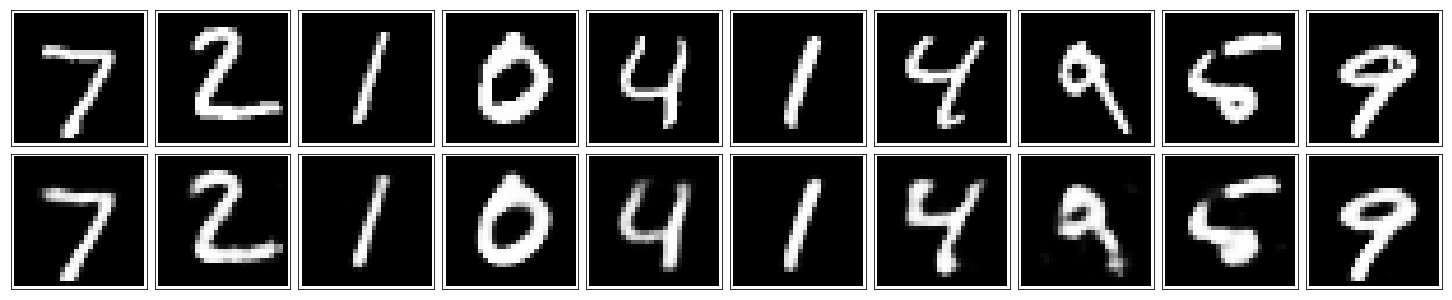

In [61]:
#comparing the original images with the reconstructed images

in_imgs = test_images[:10]
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, "./autoencoder.ckpt")
    reconstructed = sess.run(decoded, feed_dict={
        inputs: in_imgs
    })

fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20, 4))

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)